In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

In [137]:
data = pd.read_csv('../main/log/mut_step.csv', names=["algo", "mut_step","experiment_id",  "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

In [138]:
data.dataset.unique()

array(['rastrigin_(0, 1)_(0, 1)', 'rastrigin_(0, 10)_(0, 1)',
       'rastrigin_(0, 100)_(0, 1)', 'rastrigin_(0, 1000)_(0, 1)',
       'rastrigin_(0, 1)_(0, 10)', 'rastrigin_(0, 1)_(0, 100)',
       'rastrigin_(0, 1)_(0, 1000)', 'sphere_(0, 1)_(0, 1)',
       'sphere_(0, 10)_(0, 1)', 'sphere_(0, 100)_(0, 1)',
       'sphere_(0, 1000)_(0, 1)', 'sphere_(0, 1)_(0, 10)',
       'sphere_(0, 1)_(0, 100)', 'sphere_(0, 1)_(0, 1000)',
       'rosenbrock_(0, 1)_(0, 1)', 'rosenbrock_(0, 10)_(0, 1)',
       'rosenbrock_(0, 100)_(0, 1)', 'rosenbrock_(0, 1000)_(0, 1)',
       'rosenbrock_(0, 1)_(0, 10)', 'rosenbrock_(0, 1)_(0, 100)',
       'rosenbrock_(0, 1)_(0, 1000)'], dtype=object)

In [139]:
data.dropna(inplace = True)

In [140]:
data['output_scale'] = data.dataset.apply(lambda x: x.split('_')[-1])
data['input_scale'] = data.dataset.apply(lambda x: x.split('_')[-2])
data['dataset'] = data.dataset.apply(lambda x: x.split('_')[0])
data['algo'] = data['algo'] + '_' + data['mut_step']

In [153]:
data.head()

,algo,mut_step,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log,output_scale,input_scale
0,"SLIM*1SIG_(0, 0.1)","(0, 0.1)",1e5eb0e9-27fd-11ef-abb1-049226d8b1cb,rastrigin,0,0,0.363616,0.120029,1438.0,0.326778,5,1,"(0, 1)","(0, 1)"
1,"SLIM*1SIG_(0, 0.1)","(0, 0.1)",1e5eb0e9-27fd-11ef-abb1-049226d8b1cb,rastrigin,0,1,0.363616,0.112029,1622.0,0.326778,5,1,"(0, 1)","(0, 1)"
2,"SLIM*1SIG_(0, 0.1)","(0, 0.1)",1e5eb0e9-27fd-11ef-abb1-049226d8b1cb,rastrigin,0,2,0.363616,0.047011,1036.0,0.326778,5,1,"(0, 1)","(0, 1)"
3,"SLIM*1SIG_(0, 0.1)","(0, 0.1)",1e5eb0e9-27fd-11ef-abb1-049226d8b1cb,rastrigin,0,3,0.360828,0.101025,1216.0,0.286443,15,1,"(0, 1)","(0, 1)"
4,"SLIM*1SIG_(0, 0.1)","(0, 0.1)",1e5eb0e9-27fd-11ef-abb1-049226d8b1cb,rastrigin,0,4,0.352782,0.060016,1106.0,0.322538,21,1,"(0, 1)","(0, 1)"


In [142]:
algorithms = ['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']

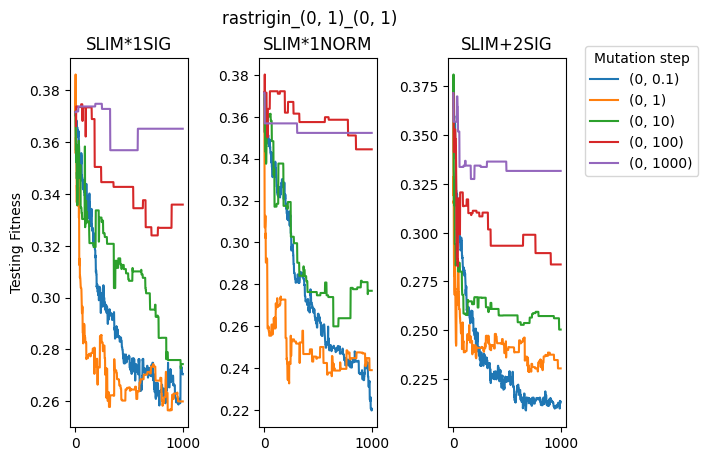

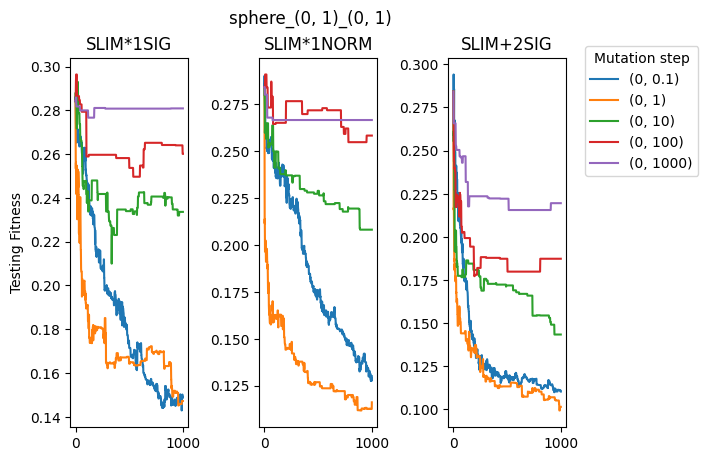

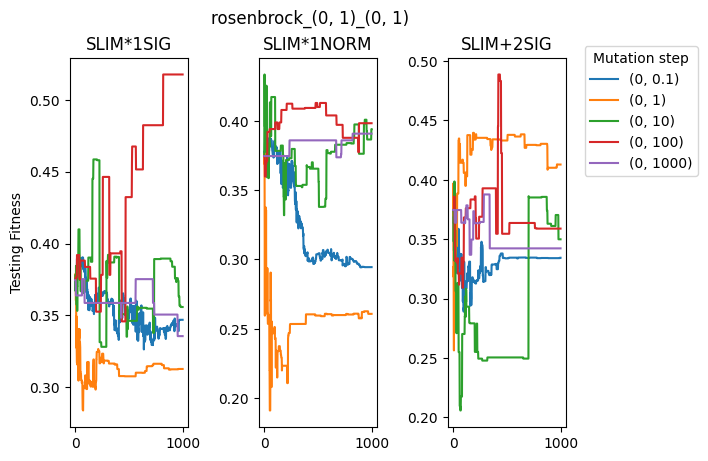

In [167]:
for dataset in data['dataset'].unique():
    for out in ['(0, 1)']:
        for inp in ['(0, 1)']:
            
            grouped = data.query("dataset == @dataset and output_scale == @out and input_scale == @inp") \
            [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
            
#             for algo in data["algo"].unique():
        
            

#             ax1 = pl.subplot(gs[0, 0]) 
#             pl.plot(grouped.index, grouped['training_fitness'], label = algo)
#             ax1.set_ylabel('Training Fitness')
#             ax1.set_title(data)
            if not grouped.values.shape[0] == 0:
            
                grouped.reset_index(inplace = True)

                
                gs = gridspec.GridSpec(1, 3)
                gs.update( wspace=0.6, hspace =  0.5)
                pl.figure()

                plt.suptitle(dataset + '_' + out + '_' + inp)
        
                for algo_ in list(filter(lambda x: algorithms[0] in x, grouped.algo.unique())):
                    ax1 = pl.subplot(gs[0, 0]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
                    ax1.set_ylabel('Testing Fitness')
                    ax1.set_title(algorithms[0])
                    
                for algo_ in list(filter(lambda x: algorithms[1] in x, grouped.algo.unique())):
                    ax2 = pl.subplot(gs[0, 1]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax2.set_ylabel('Testing Fitness')
                    ax2.set_title(algorithms[1])

                for algo_ in list(filter(lambda x: algorithms[2] in x, grouped.algo.unique())):
                    ax3 = pl.subplot(gs[0, 2]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['test_fitness'], label = algo_.split('_')[-1])
#                     ax3.set_ylabel('Testing Fitness')
                    ax3.set_title(algorithms[2])
                    ax3.legend(bbox_to_anchor=(1.1, 1.05), title = 'Mutation step')

                plt.show()


#             ax3 = pl.subplot(gs[0, 2]) 
#             pl.plot(grouped.index, grouped['elite_size'], label = algo)
#             ax3.set_ylim(0, 3000)
#             ax3.set_ylabel('Elite size')
#             ax3.legend(bbox_to_anchor=(1.1, 1.05))
    

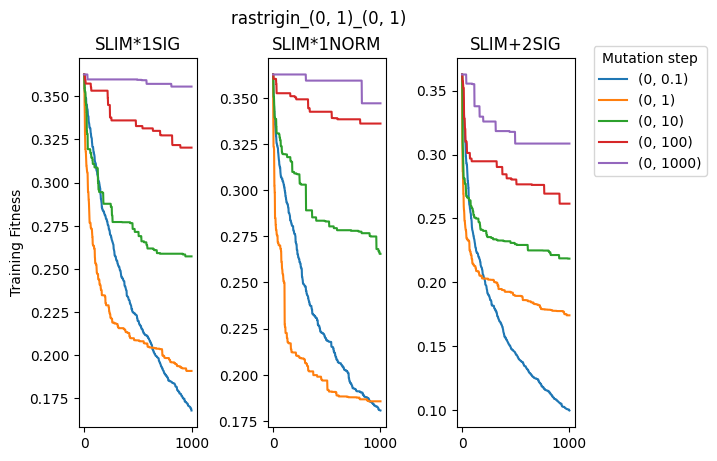

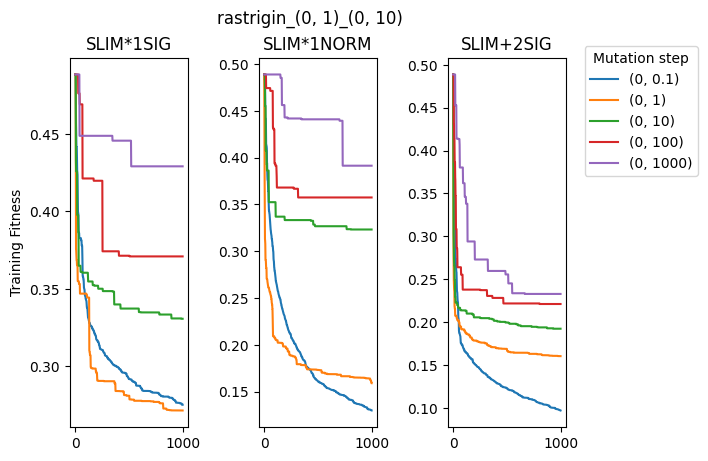

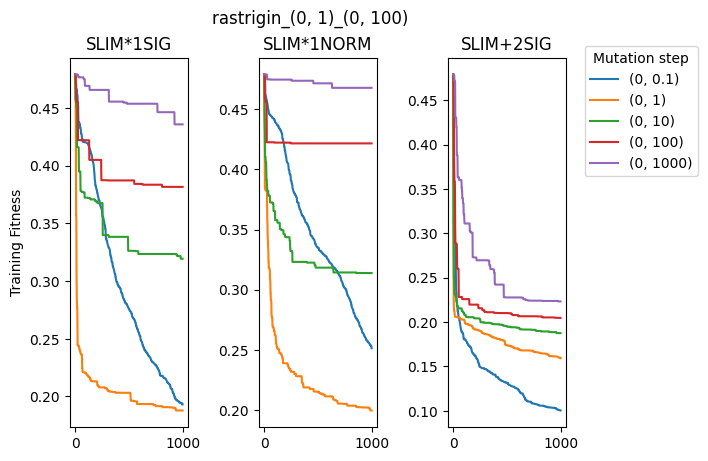

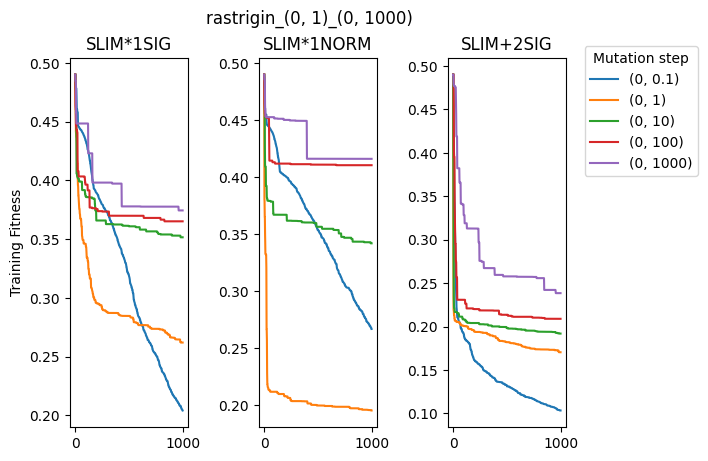

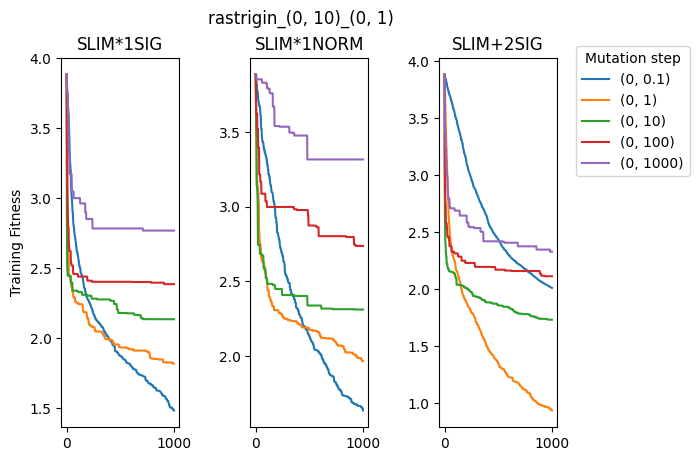

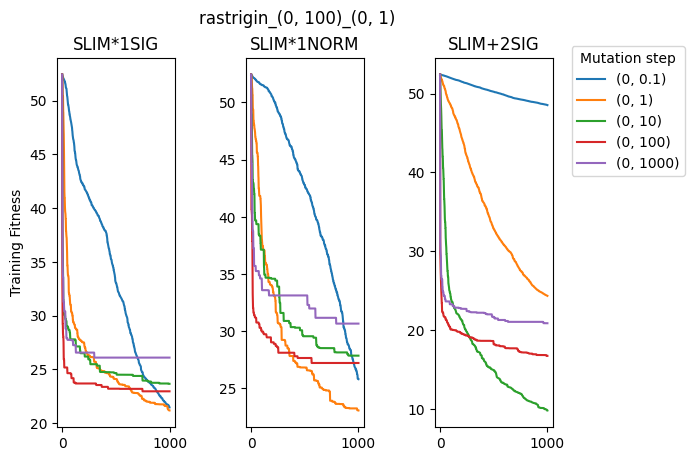

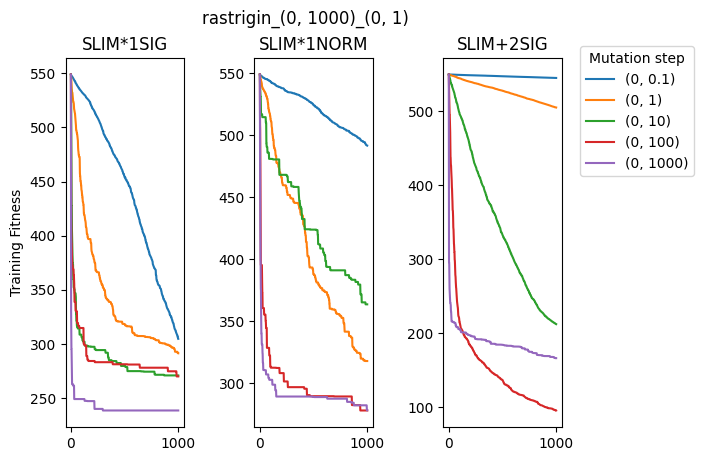

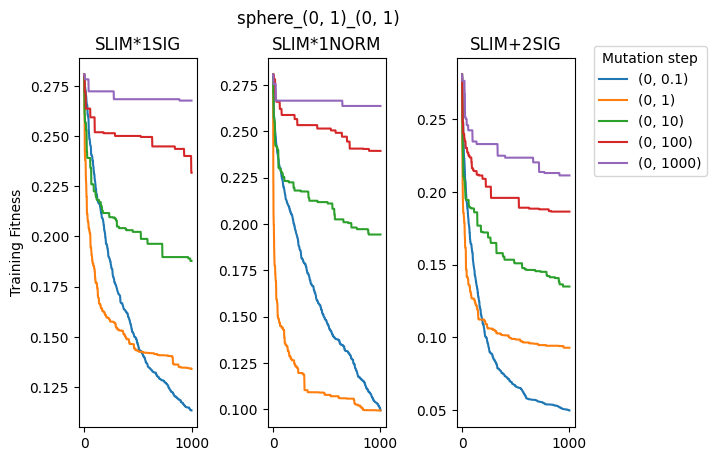

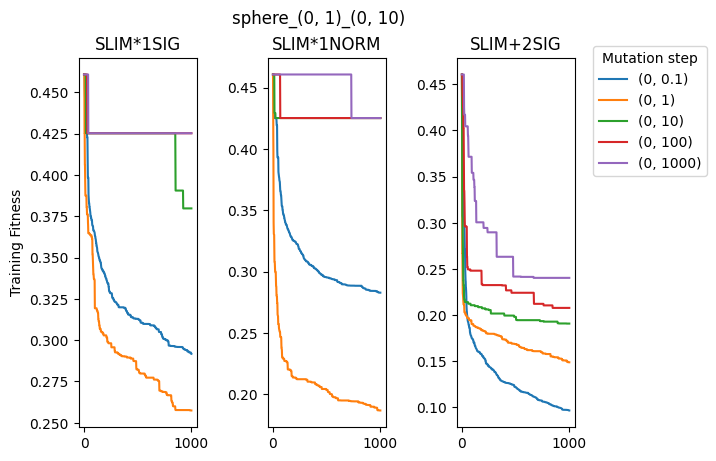

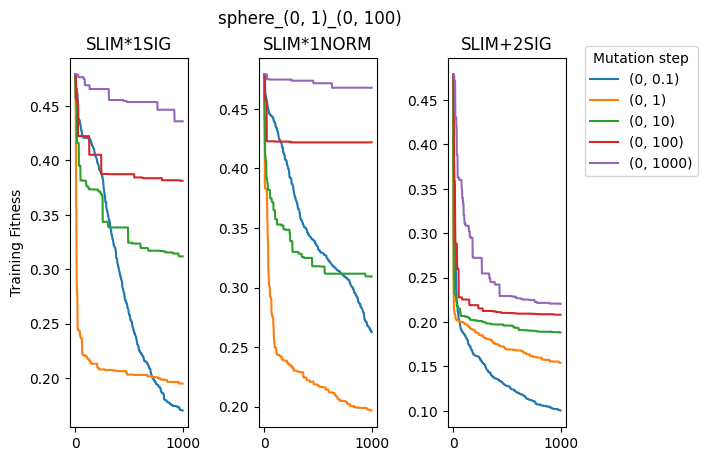

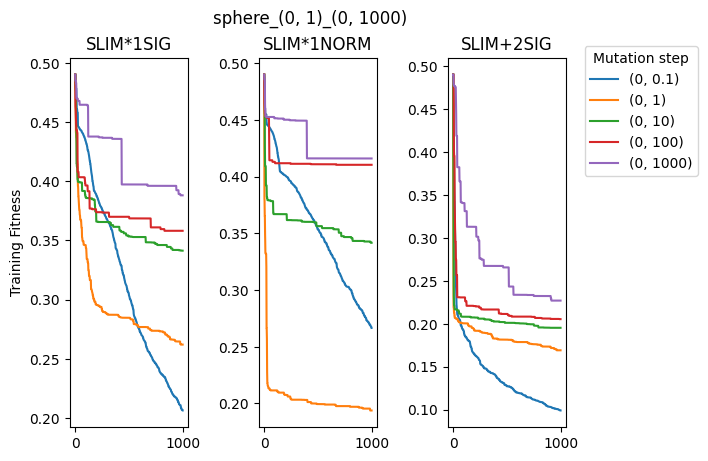

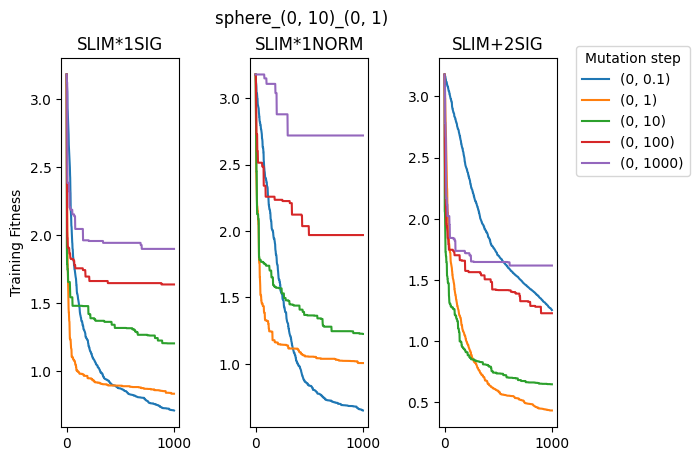

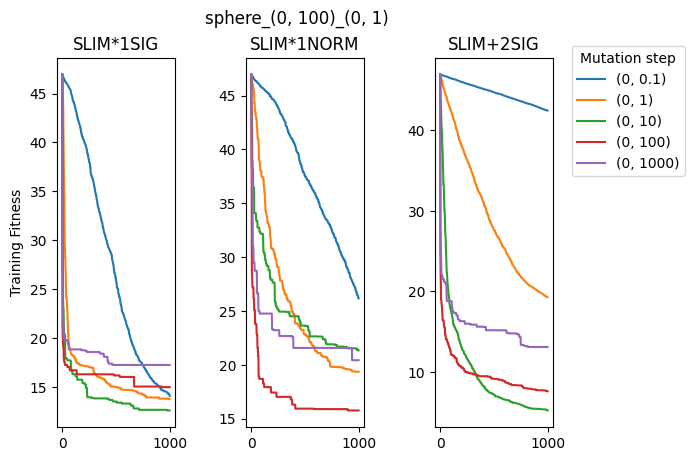

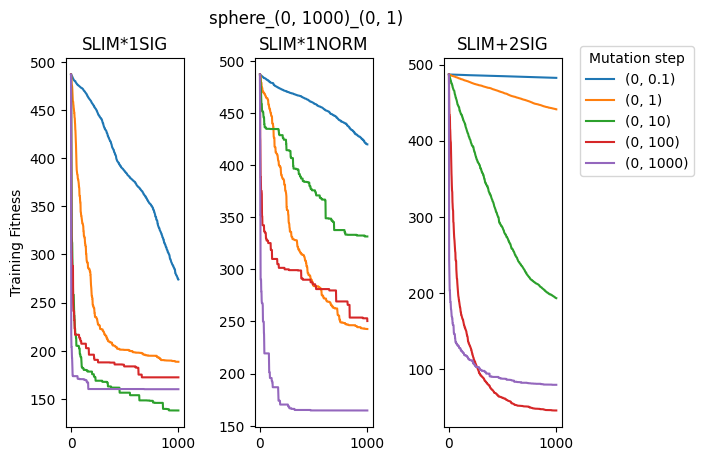

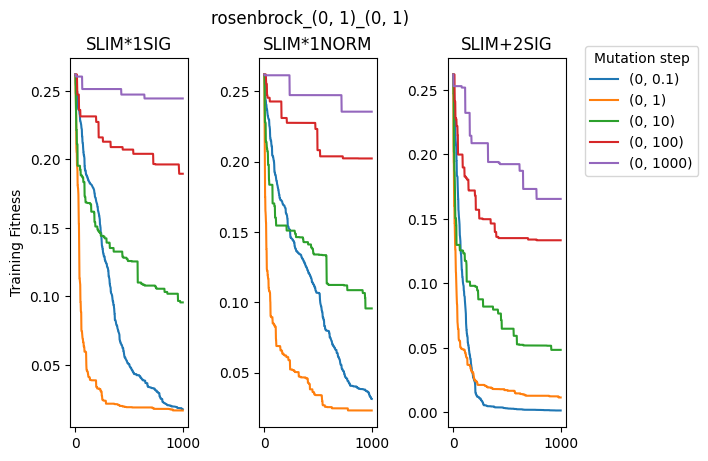

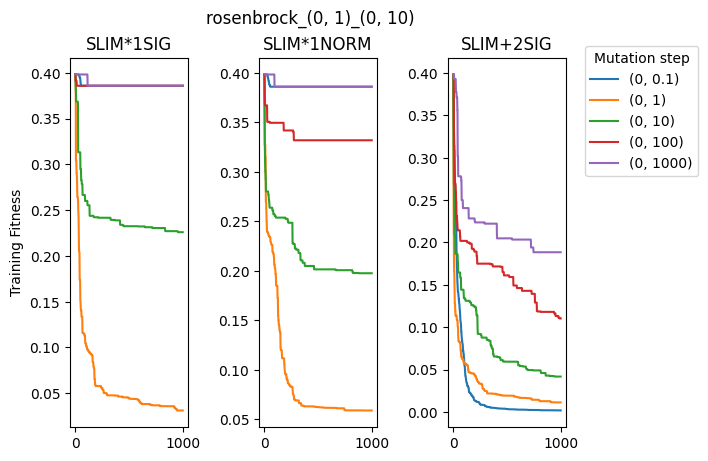

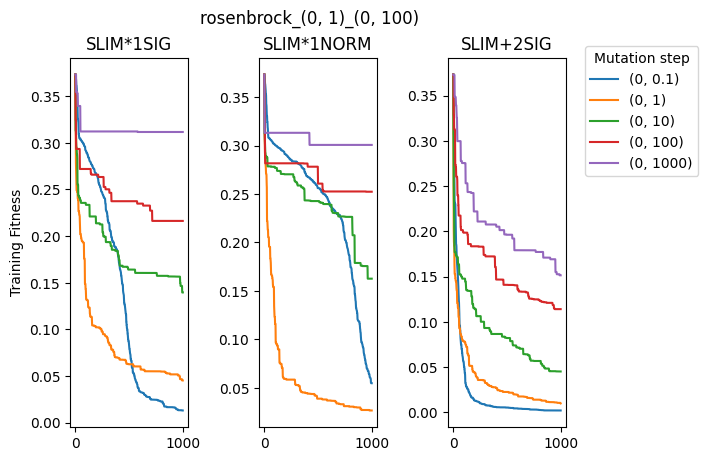

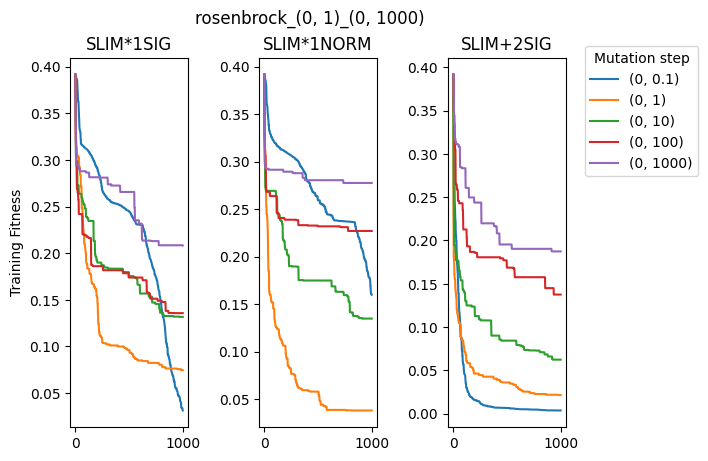

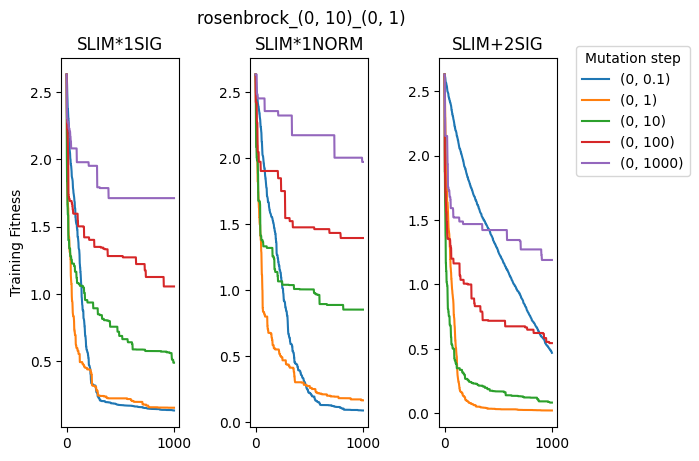

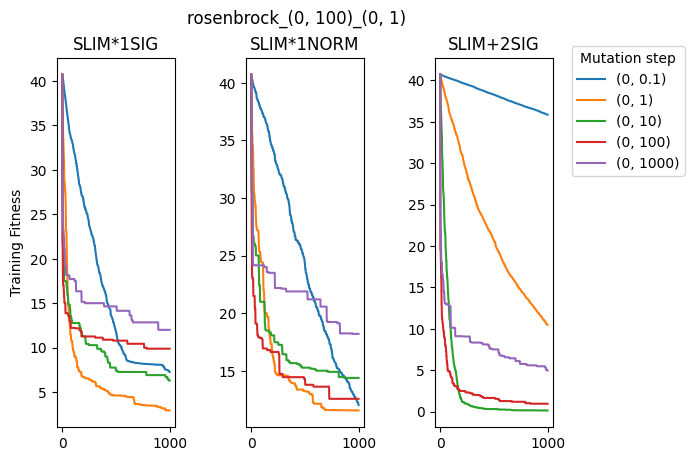

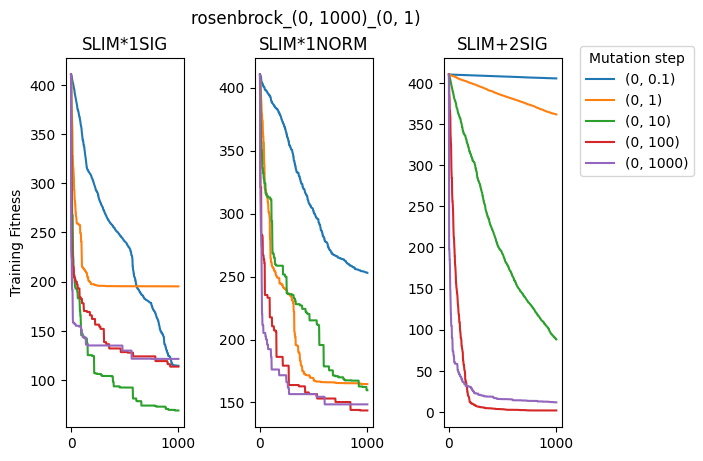

In [163]:
for dataset in data['dataset'].unique():
    for out in data['output_scale'].unique():
        for inp in data['input_scale'].unique():
            
            grouped = data.query("dataset == @dataset and output_scale == @out and input_scale == @inp") \
            [['generation', 'training_fitness', 'test_fitness', 'elite_size', 'algo']].groupby(['generation', 'algo']).median()
            
#             for algo in data["algo"].unique():
        
            

#             ax1 = pl.subplot(gs[0, 0]) 
#             pl.plot(grouped.index, grouped['training_fitness'], label = algo)
#             ax1.set_ylabel('Training Fitness')
#             ax1.set_title(data)
            if not grouped.values.shape[0] == 0:
            
                grouped.reset_index(inplace = True)

                gs = gridspec.GridSpec(1, 3, width_ratios = [1, 1, 1])
                gs.update( wspace=0.6, hspace =  0.5)
                pl.figure()

                plt.suptitle(dataset + '_' + out + '_' + inp)
        
                for algo_ in list(filter(lambda x: algorithms[0] in x, grouped.algo.unique())):
                    ax1 = pl.subplot(gs[0, 0]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['training_fitness'], label = algo_.split('_')[-1])
                    ax1.set_ylabel('Training Fitness')
                    ax1.set_title(algorithms[0])
                    
                for algo_ in list(filter(lambda x: algorithms[1] in x, grouped.algo.unique())):
                    ax2 = pl.subplot(gs[0, 1]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['training_fitness'], label = algo_.split('_')[-1])
#                     ax2.set_ylabel('Testing Fitness')
                    ax2.set_title(algorithms[1])

                for algo_ in list(filter(lambda x: algorithms[2] in x, grouped.algo.unique())):
                    ax3 = pl.subplot(gs[0, 2]) 
                    pl.plot(range(max(grouped.generation+1)), grouped.query("algo == @algo_")['training_fitness'], label = algo_.split('_')[-1])
#                     ax3.set_ylabel('Testing Fitness')
                    ax3.set_title(algorithms[2])
                    ax3.legend(bbox_to_anchor=(1.1, 1.05), title = 'Mutation step')

                plt.show()


#             ax3 = pl.subplot(gs[0, 2]) 
#             pl.plot(grouped.index, grouped['elite_size'], label = algo)
#             ax3.set_ylim(0, 3000)
#             ax3.set_ylabel('Elite size')
#             ax3.legend(bbox_to_anchor=(1.1, 1.05))
    